In [34]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import glob

In [35]:
# name the files you want to import
P = '/Users/elizabeth/egregorio@gwmail.gwu.edu - Google Drive/My Drive/Elizabeth-Diver-Experiment-Fall-2021/moment/first 20 frames/';
D = '09182021';
# put together the full filenames
files = glob.glob(P + D + "/*.csv")

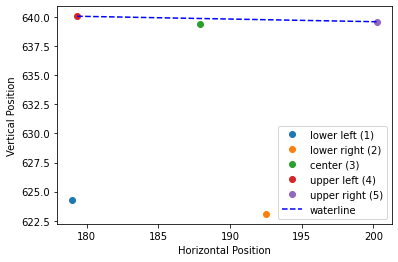

In [81]:
df = pd.read_csv(files[6], names=['point1_x', 'point1_y', 'point2_x', 'point2_y',
                                  'point3_x', 'point3_y','point4_x', 'point4_y','point5_x', 'point5_y'])

#graphing x and y points, where x & y are counter-intuitive (does not reflect real-world)
#matches direction of motion in video
point1_y = df.iloc[:,0]
point1_x = df.iloc[:,1]

point2_y = df.iloc[:,2]
point2_x = df.iloc[:,3]

point3_y = df.iloc[:,4]
point3_x = df.iloc[:,5]

point4_y = df.iloc[:,6]
point4_x = df.iloc[:,7]

point5_y = df.iloc[:,8]
point5_x = df.iloc[:,9]

p=4

waterline_x = [point4_x[p],point5_x[p]]
waterline_y = [point4_y[p],point5_y[p]]


plt.plot(point1_x[p],point1_y[p],'o', label='lower left (1)')
plt.plot(point2_x[p],point2_y[p],'o', label='lower right (2)')
plt.plot(point3_x[p],point3_y[p],'o', label='center (3)')
plt.plot(point4_x[p],point4_y[p],'o', label='upper left (4)')
plt.plot(point5_x[p],point5_y[p],'o', label='upper right (5)')
plt.plot(waterline_x,waterline_y,'--',label='waterline',color='blue')
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.legend()
#plt.ylim(590,630)
#plt.xlim(150,230)
plt.show()

In [82]:
# Import all the point values
p1_x = point1_x.values
p1_y = point1_y.values
p2_x = point2_x.values
p2_y = point2_y.values
p4_x = point4_x.values
p4_y = point4_y.values
p5_x = point5_x.values
p5_y = point5_y.values

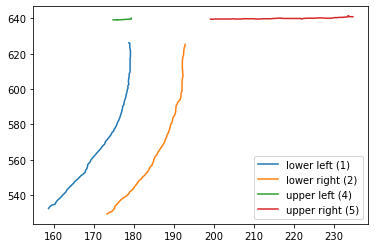

In [83]:
plt.figure()
plt.plot(p1_x,p1_y,label='lower left (1)')
plt.plot(p2_x,p2_y,label='lower right (2)')
#plt.plot(p3_x,p3_y,label='center (3)')
plt.plot(p4_x,p4_y,label='upper left (4)')
plt.plot(p5_x,p5_y,label='upper right (5)')
plt.legend()
plt.show()

In [84]:
# Step 1: Find the slopes for each of the lines
# slope = m = rise / run = (y_2 - y_1) / (x_2 - x_1)

m_w  = ( p4_y - p5_y ) / ( p4_x - p5_x )
m_12 = ( p1_y - p2_y ) / ( p1_x - p2_x )
m_14 = ( p1_y - p4_y ) / ( p1_x - p4_x )
m_25 = ( p2_y - p5_y ) / ( p2_x - p5_x )

m_c = [m_12, m_14, m_25]


# Step 2: Find the angles between each of the lines

theta = np.zeros( (3, len(m_w)) )

for i in range(0,len(m_c)):
    for j in range(0,len(m_w)):
        if (m_w[j] * m_c[i][j]) == -1:
            theta[i,j] = np.pi / 2
        else:
            theta[i][j] = np.arctan( ( m_w[j] - m_c[i][j] ) / ( 1 + ( m_w[j] * m_c[i][j] ) ) )

theta = np.degrees(theta)

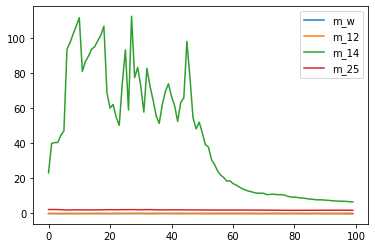

In [85]:
plt.figure()
plt.plot(m_w,label='m_w')
plt.plot(m_12,label='m_12')
plt.plot(m_14,label='m_14')
plt.plot(m_25,label='m_25')
plt.legend()
#plt.ylim(-4,4)
plt.show()

In [86]:
theta_12 = theta[0][:]
theta_14 = theta[1][:]
theta_25 = theta[2][:]

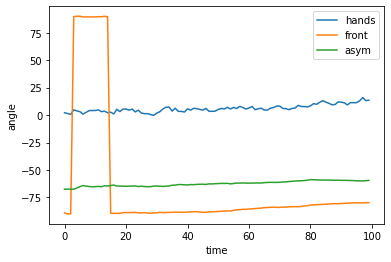

In [87]:
plt.figure()
plt.plot(theta_12,label='hands')
plt.plot(theta_14,label='front')
plt.plot(theta_25,label='asym')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

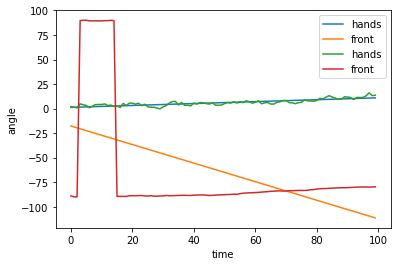

In [88]:
x_points = np.linspace(0,99,len(m_w))

f12 = np.polyfit(x_points,theta_12,1)
f14 = np.polyfit(x_points,theta_14,1)
f25 = np.polyfit(x_points,theta_25,1)

p12 = np.poly1d(f12)
p14 = np.poly1d(f14)
p25 = np.poly1d(f25)

plt.figure()
plt.plot(x_points,p12(x_points),label='hands')
plt.plot(x_points,p14(x_points),label='front')
#plt.plot(x_points,p25(x_points),label='asym')
plt.plot(theta_12,label='hands')
plt.plot(theta_14,label='front')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle')
plt.show()

In [89]:
print('hands = ',f12[0])
print('front = ',f14[0])
print('asym = ',f25[0])

hands =  0.09777143116353859
front =  -0.9460015853350591
asym =  0.07753077805107196


In [90]:
# Step 3 / 4: compare angles and calculate the angle with verticle in multiple ways to find the average

# theta_14 is the angle with the verticle
theta_1 = -1 * theta_14

# theta_14 = 180 - ( 90 + theta_12 )
theta_2 = 180 - ( 90 + theta_12 )

# theta_14 = 180 - ( theta_25 + asym )
asym = 22.7
theta_3 = 180 + theta_25 - asym 

theta = [theta_1, theta_2, theta_3]


# Figure proves that this works

#plt.figure()
#plt.plot(theta_1,label='theta 1')
#plt.plot(theta_2,label='theta 2')
##plt.plot(-theta_3+50,label='theta 3')
#plt.legend()

# We want to do this with the interpolated values


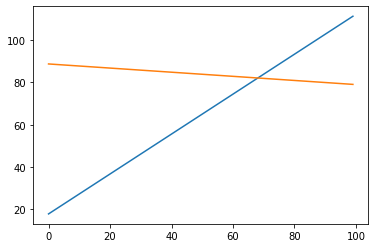

In [91]:
line_12 = p12(x_points)
line_14 = p14(x_points)
line_25 = p25(x_points)

t1 = -1 * line_14
t2 = 180 - (90 + line_12)

theta = [t1, t2]
#print(theta)

#print(t1 - t2)


plt.figure()
plt.plot(t1)
plt.plot(t2)

plt.show()